# <div align='center'>Real-Time HandWriting Recognition Using TensorFlow and Raspberry PI

## <div align="center">Prepared by: 
<div align="center">Jason Greaves-Taylor

<div align="center"> In partial fulfillment of the requirements for CPE 4903

<div align="center"> Instrutor: <u> Hai Ho </u>

<div align="center"> <font size='5'> Data: December 08, 2021

<div align="center"> <font size="5"> Kennesaw State University

## <div align="center"> <font size='5'> <u> Abstract </u>

This paper documents work done to create an embedded system running Tensorflow 2 and OpenCV in order to predict and classify hand writen numeral characters via image capture. The overall purpose of this work was to show that a small, low powered system could provide accurate, robust results using a trained convoluted neural network in real time. The hardware items used were a Raspberry Pi 3 B+, a SenseHat, and a PiCamera. The software used were Tensorflow and OpenCV via Python.

The results showed that such a system could be created and operated while providing reliable and accurate results. The system captures images via camera, converts them into an OpenCV object, filters them to be in a negative binary format, then passes that data through a pre-trained convoluted neural network. The network then predicts the output and gives a confidence interval above 50%, usually above 70% in most instances, as to the numeral that was captured with a ~90% accuracy rating.


# <div align="center"> <u> Introduction </u>

## Getting Started

The Real-Time Handwriting Recognition System was developed as an embedded system which had three physical components and  two code processes. The system took in images using a PiCamera attached to a Raspberry Pi 3 B+. The PI would then run a pretrained neural network for the purposes of classifing the objects in the images that were captured. Once classifcation was completed, it would return a confidence value to the Linux Terminal and the SenseHat's LED will display the number that it predicts is in the image. The system will take a picture every time the user presses the "C" key and quits the process when the user presses the "Q" key.

## Theory

Neural Networks and Machine Learning is the process of using the mathematical concept of systems of equations also known as linear algebra to approximate the concept of learning as experienced by humans. The derivations used to create the equations are pretty mathematically intensive but given how complex the human brain is this is to be expected when trying to apporoximate it on a number crunching machine. 

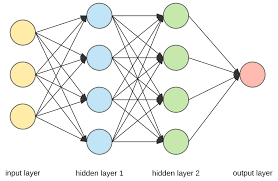

<div align="center"> <i>Figure 1: Image of a typical Neural network</i>

The above image is an example the typical neural network architecture. In the most basic neural network there is an input layer where the intial data is introduced the network, a hidden layer which would the process the data finally an output layer which would spit out result. The above picture is slightly more complicated than the most basic neural network as it has 2 hidden layers where the data being introduced would be processed twice as opposed just once before going to output. As the complexity of the opperation that you wish to have your neural network tackle increases so does you number of hidden layers until you get to applications like DALLE which according to nimblebox.ai has upwards of 64 hidden layers.

Typically the applications of neural networks fall under three major categories. These categories are: Prediction, Classification and Generation. For this project our neural network fell under the Classification category and we used type of Neural Network called a Convolutional Neural Network (CNN). This neural network is widely used for image/video detection and is known for being pretty computationally efficient when compared to other types of neural network such as the Multi-Layer Perceptrons (MLP). 

# <div align="center"> <u>Procedure</u>

## Intial Set up

The very first steps for creating the software side of the system used was to prepare the Raspberry Pi by downloading the dependencies, Tensorflow 2, NumPy, OpenCV as well as the SenseHat module. Additionally, one of the steps taken was to downgrade the Python version present on the Raspberry Pi to Python version 3.7.12 because as of November 2022, tensorflow does not work with the most recent version of Python (Python 3.9.2). Once these intital steps were complete we moved on to building the model.

## Creating the Model

The code below was used to create the CNN model used to classify the handwritten numbers.

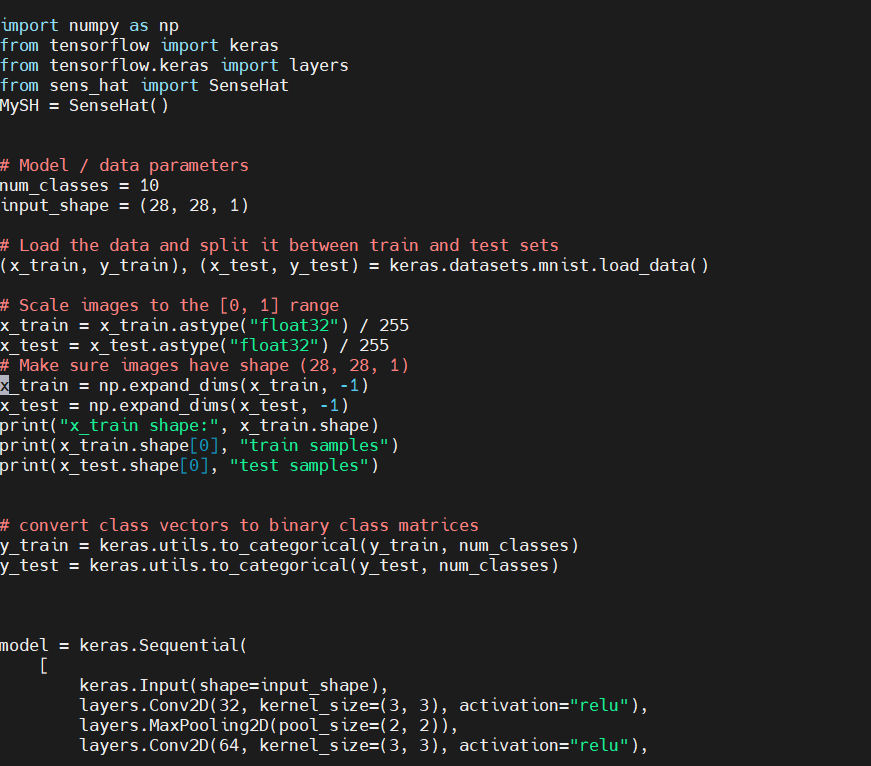

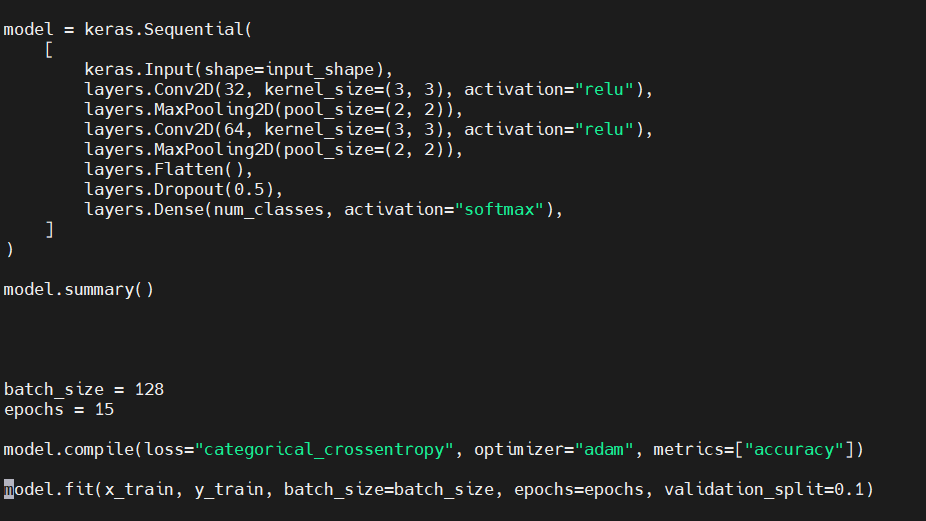

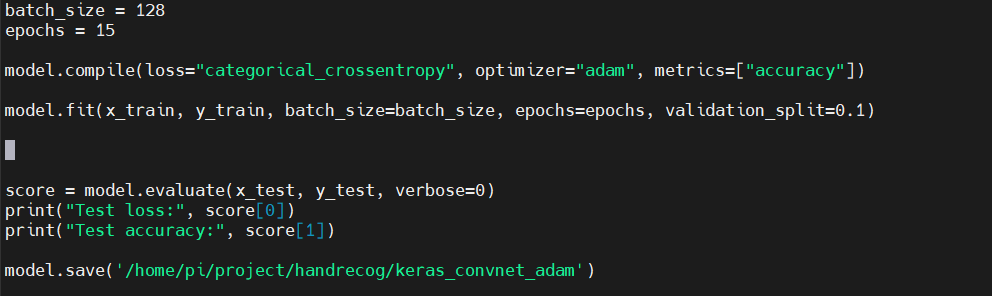

<div align="center"> <i>Figure 2: Code used for creating the model</i>

The data that was loaded came from an online database called the Modified National Institue of Standards and Technology (MNIST). This database is a large number of handwritten digits that was specifically created to be used in the training of image processing for recognizing handwritten numbers. By loading the database in to the model we don't have require to download all the labeled images so we can distribute our system easily if we so desired. Additionally, this made it easier to train our system on our Raspberry Pi, a system with limited resources.

## Using The Model

In addition to the code for creating the model another script was created for the purpose controlling system by actively detecting digits using the Raspberry Pi Camera and using the model to compare the images to the labeled data. Once the model predicted a potential digit, the predicted digit would be displayed on the SenseHat module.

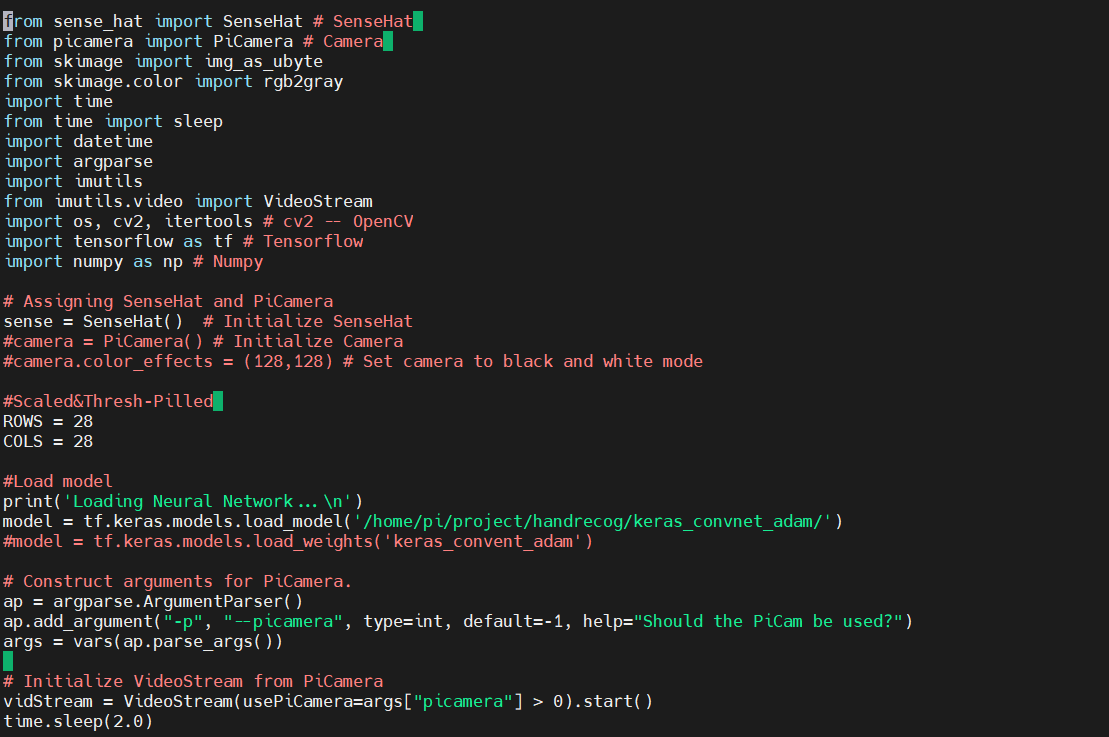

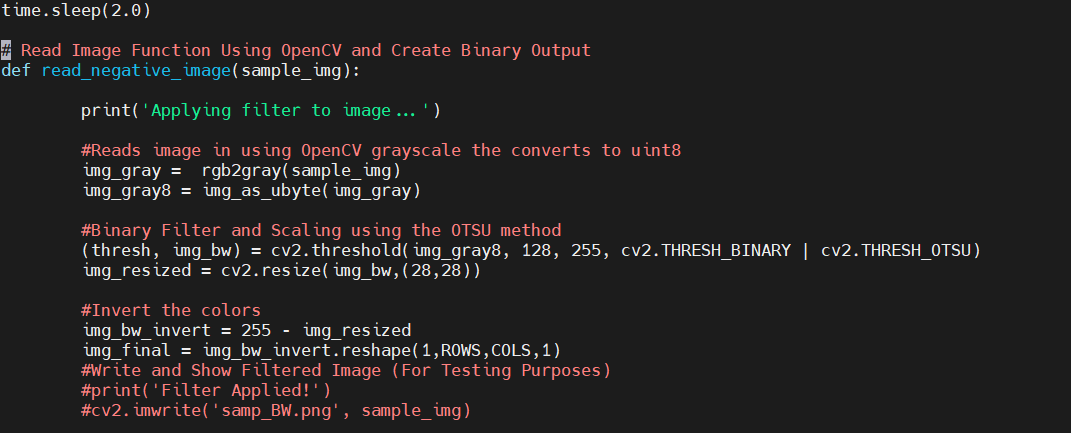

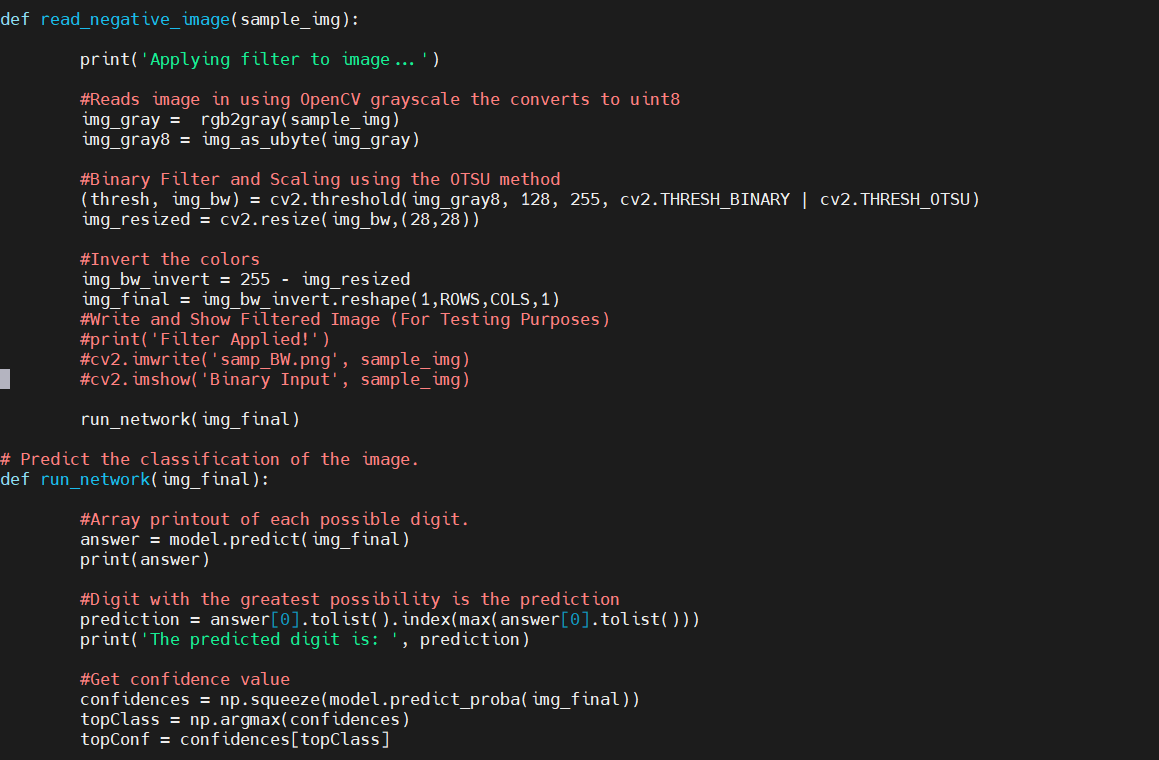

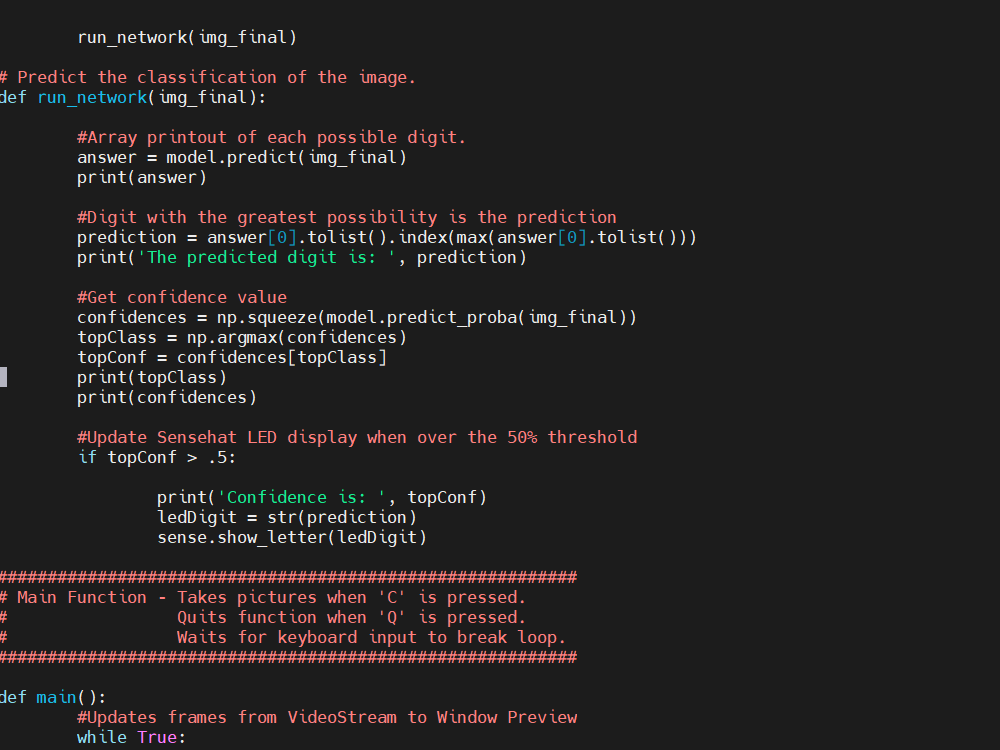

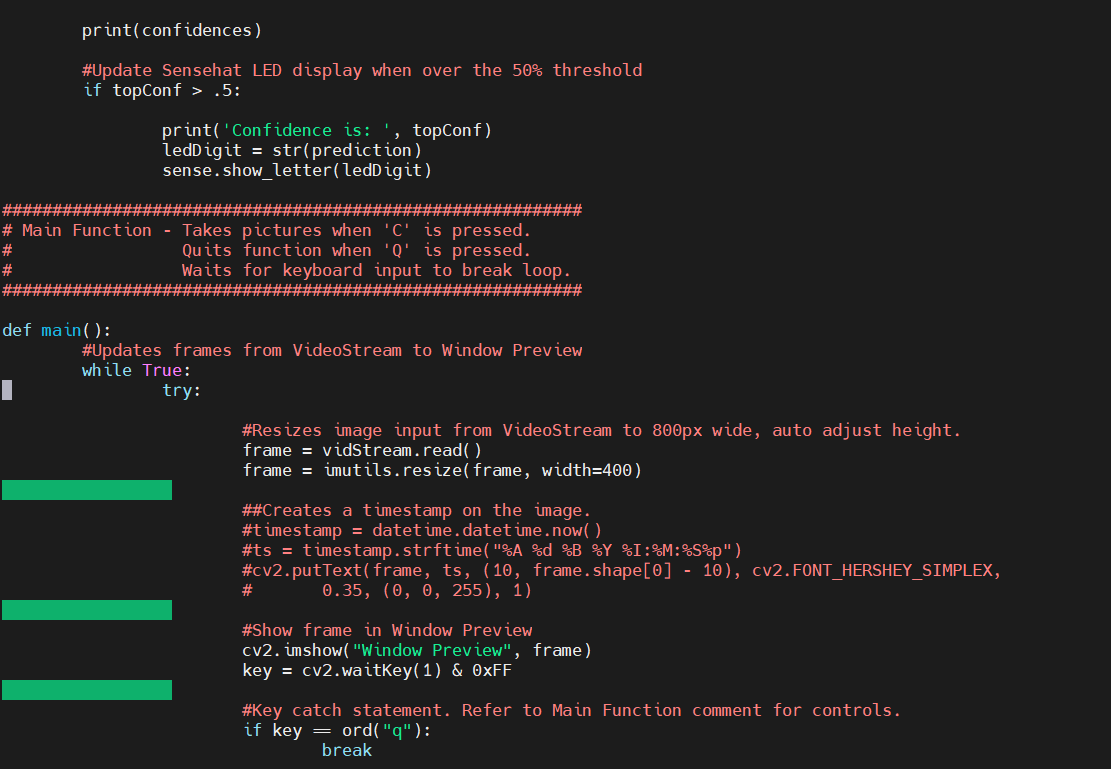

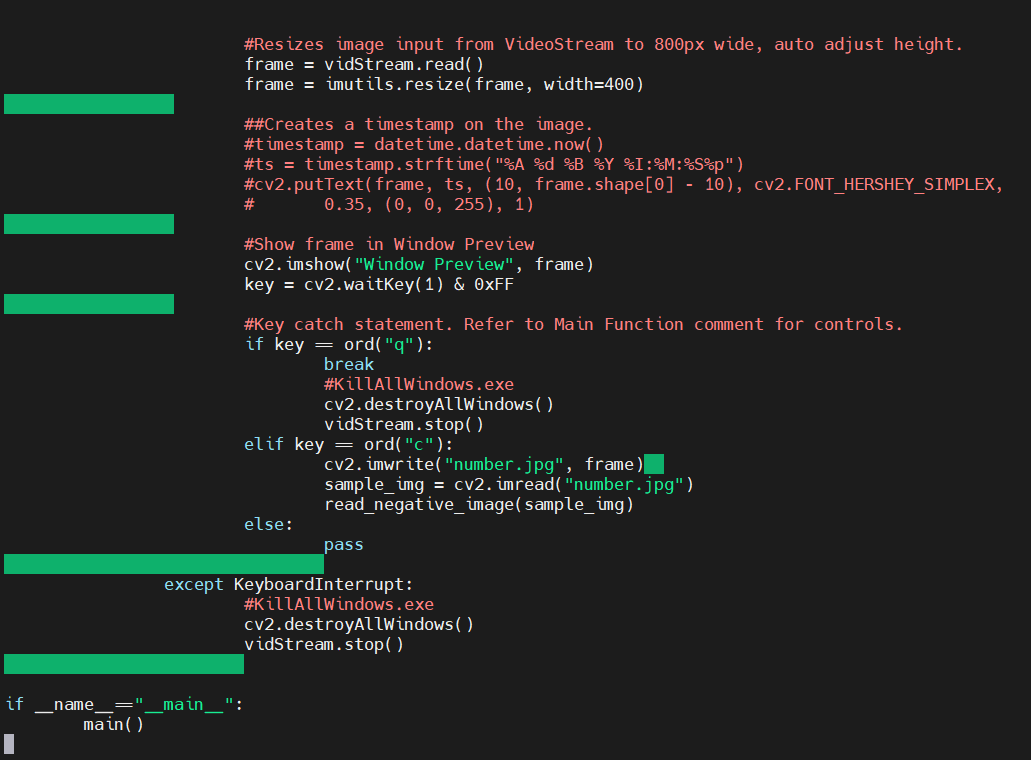

<div align="center"> <i>Figure 3: Code used for controlling</i>

This code had three main functions. The first function takes control of the PiCamera by creating a live video preview in a window. This live video allows the user so line up the camera properly with the hand written  digit to get a clear picture. To capture the image for the model, the program waits in a while loop for the user to input "C" using the keyboard and when the user wishes to stop they input "Q" on the keyboard.

The second function was to take the image and reverse it from black text on a white background to white text on a black background. This function was added because the labeled data is in the form of white text on a black background. It works by saving the image into memory and doing several transformations. Including the res

The last function is use to call the model. With the image processed, it is fed to the model in the model.predict function to use the pre-trained weights created in the previous script used for train the model. The predict fuction will return a value if the threshold is greater than 50%, the SenseHat's Led display will be actuated to display the predicted digit.

# <div align="center">  <u> Design </u>

This system was designed to be pretty simplistic as it only required three hardware compontents. These compontents are realitve easy to come by and can be sourced at Microcenter or Amazon. Once again these components are the Raspberry PI 3 Model B+, the PiCamera and the SenseHat. Below is a picture of the system that was used to test this system.

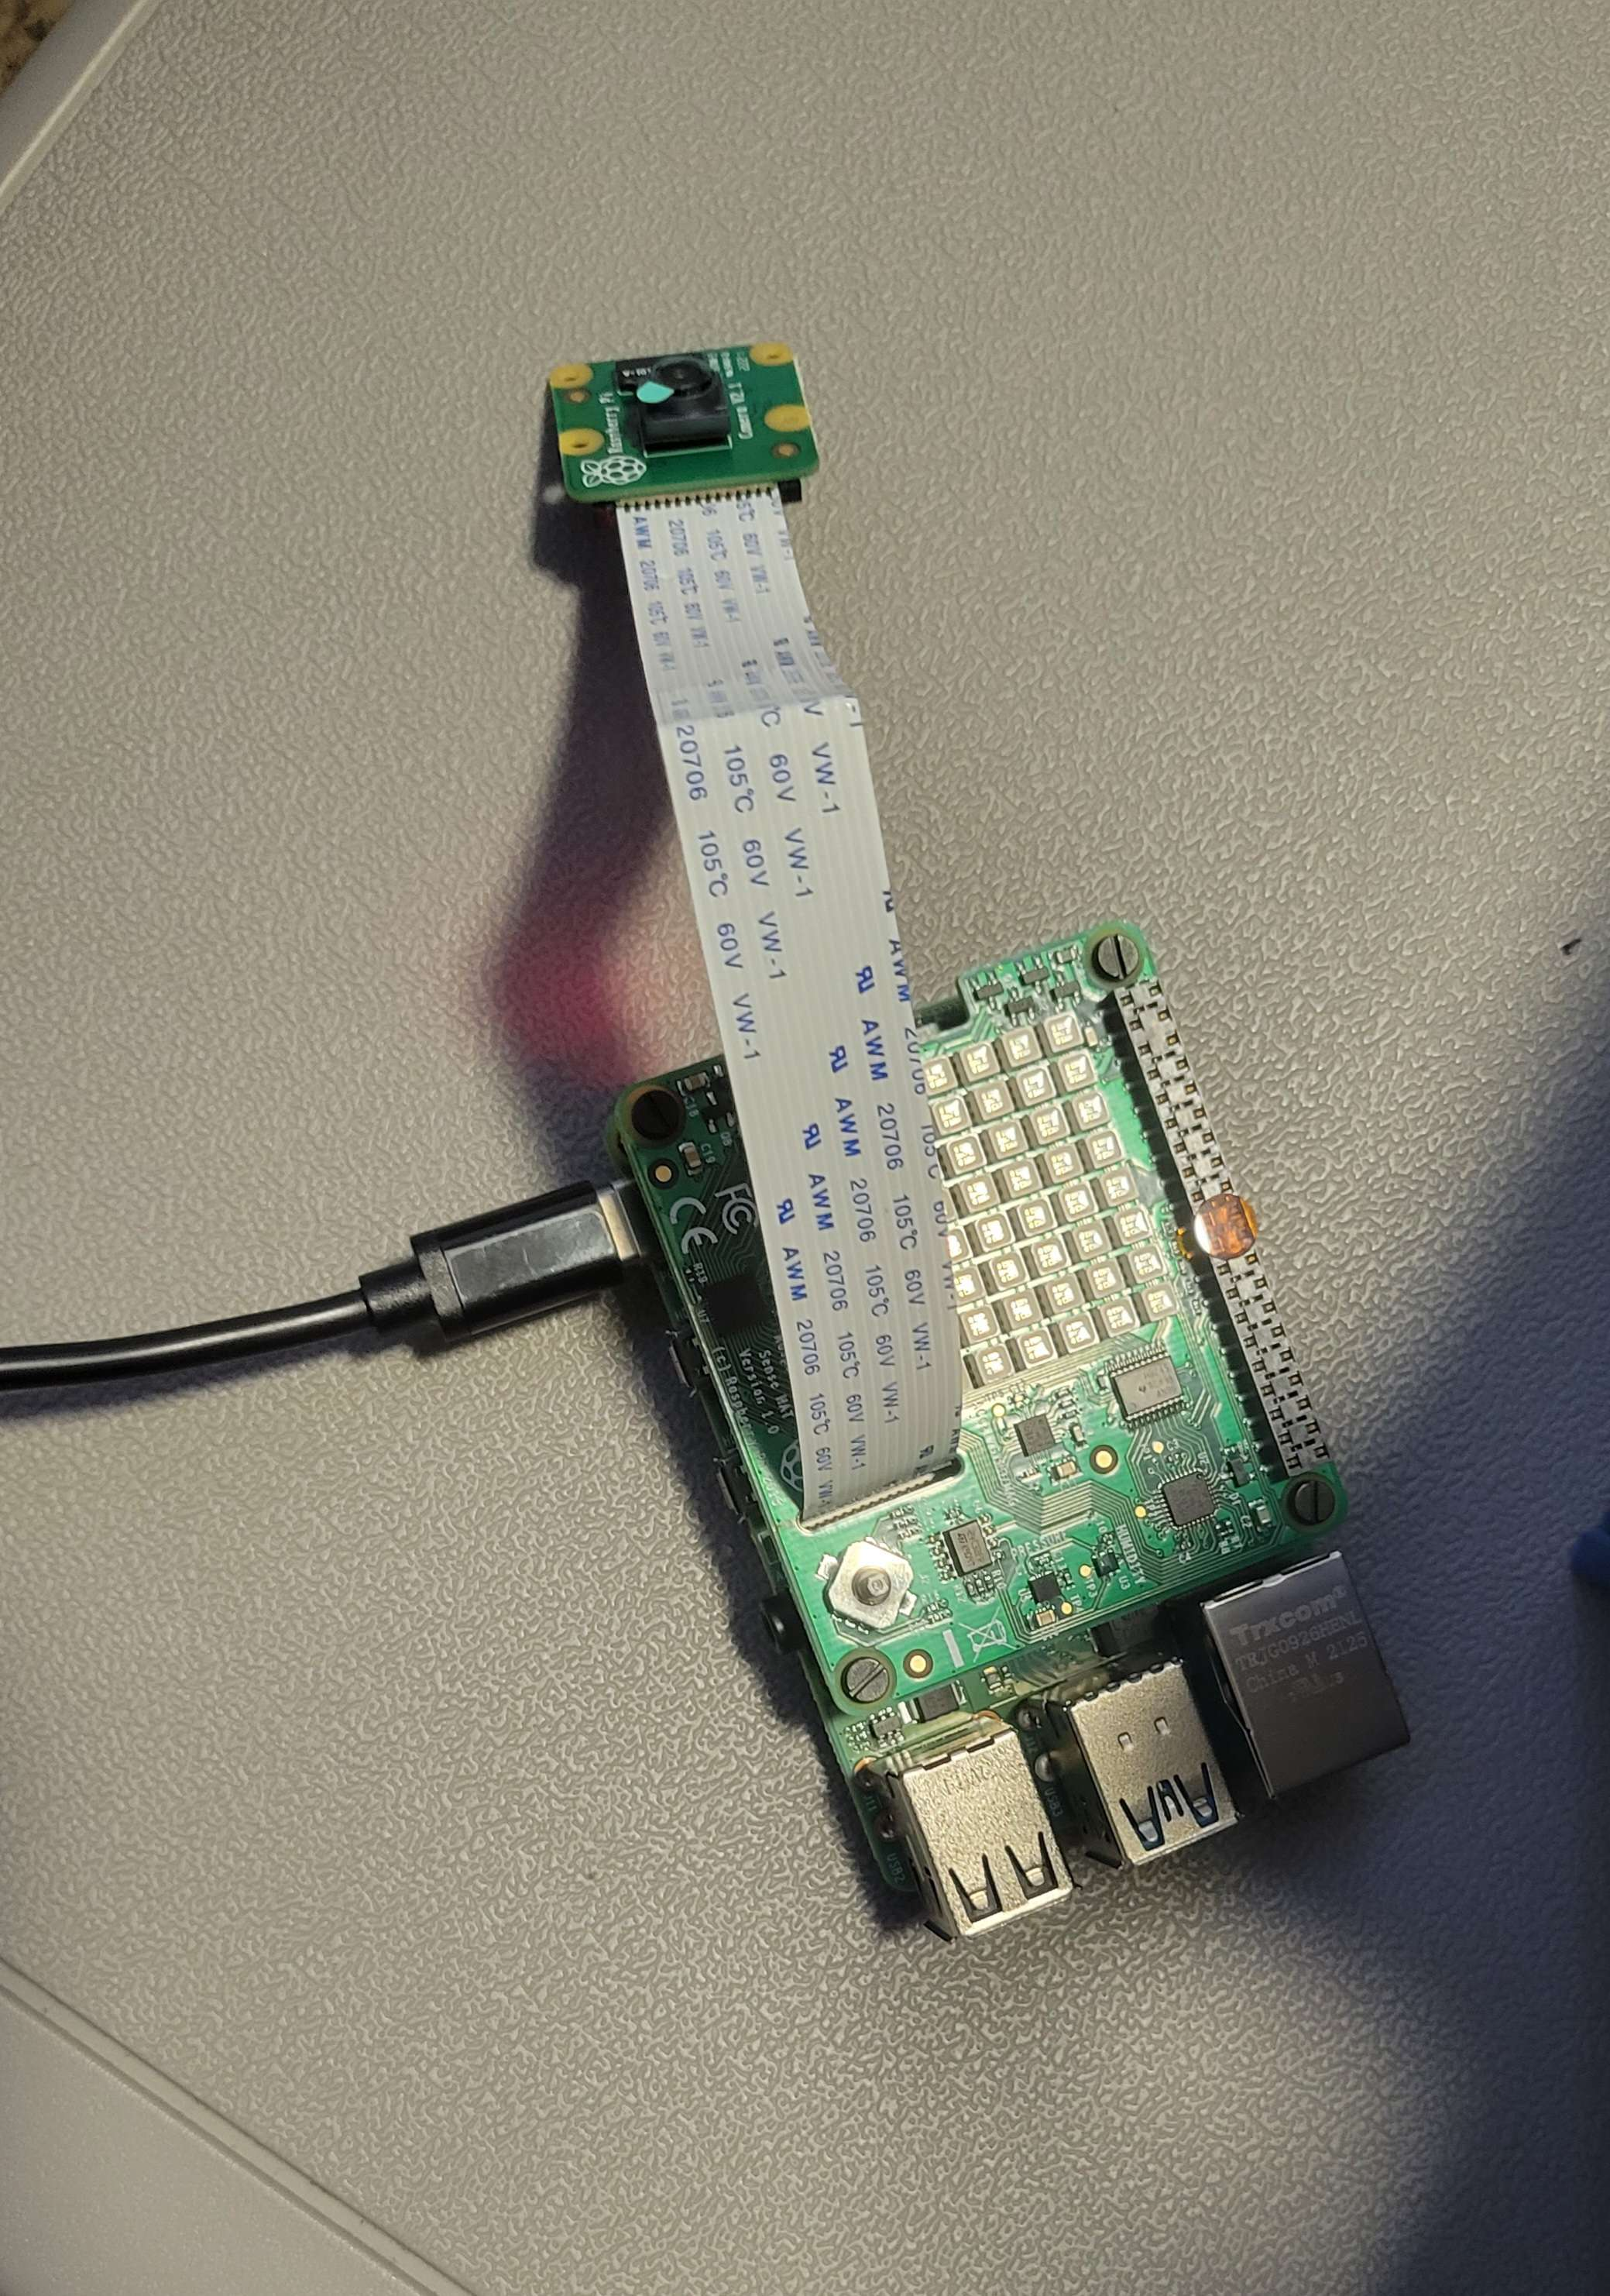

<div align="center"> <i>Figure 4: Image of completed system</i>

## Hardware

The Raspberry Pi 3 B+ has a Cortex - A53 ARM processor running at 1.4 GHz, and 1GB of DDR2 RAM and an extended 40- pin GPIO header. The SenseHat was attached to the pi using the GPIO header which allows for the use of the LED display. The Pi camera was attached to the PI with a UxCell ribbon cable to the Pi's camera port.

## Design Limitations

While the system works pretty well in ideal situations, in non ideal situations the system struggles. It really struggles if there are any shadows on the page. This is because the images in the database that it was trained from were taken in perfect conditions which means for you to use the system effectively you need a clean image.

To help combat this the preview window in the live video stream from the camera was used in conjuction with requiring the user to confirm that they wanted to capture the image. This helps the user to try to take as clean an image as possible with as few shadows.

Another design limitation is the resources avalible on the raspberry pi for training.  Whilst it is possible to train the model on the pi, it takes an incredibly long time to complete that training. So to combat this in future versions, if you had to retrain the model, I would recommend that training is done on a laptop or a desktop computer. This would allow for the training to be completed more quickly. 

# <div align="center"> <u>Data</u>

## Data

The following data was taken from both the training and testing of the model.It shows the accuracy and loss of both sets of data. The model was trainned using 2 hidden layers of sizes 32 and 64 respectively. Additionally, Each hidden layer had a ReLU activation fuction. The outputs was then flattened and with a random drop out of 50 percent to prevent overfitting of the data during each interation. Finally, the outputs at the very end were detemined using a 'softmax' activation fuction.

The model had 15 epochs with a 128 batches per epoch. This means that the model lasted for apporixmately 1920 iterations. Since the goal of this system was the classification of images into multiple categories we used the categorical_crossentropy with a the "Adam" optimizer. Below is the results of the trainning of my model.

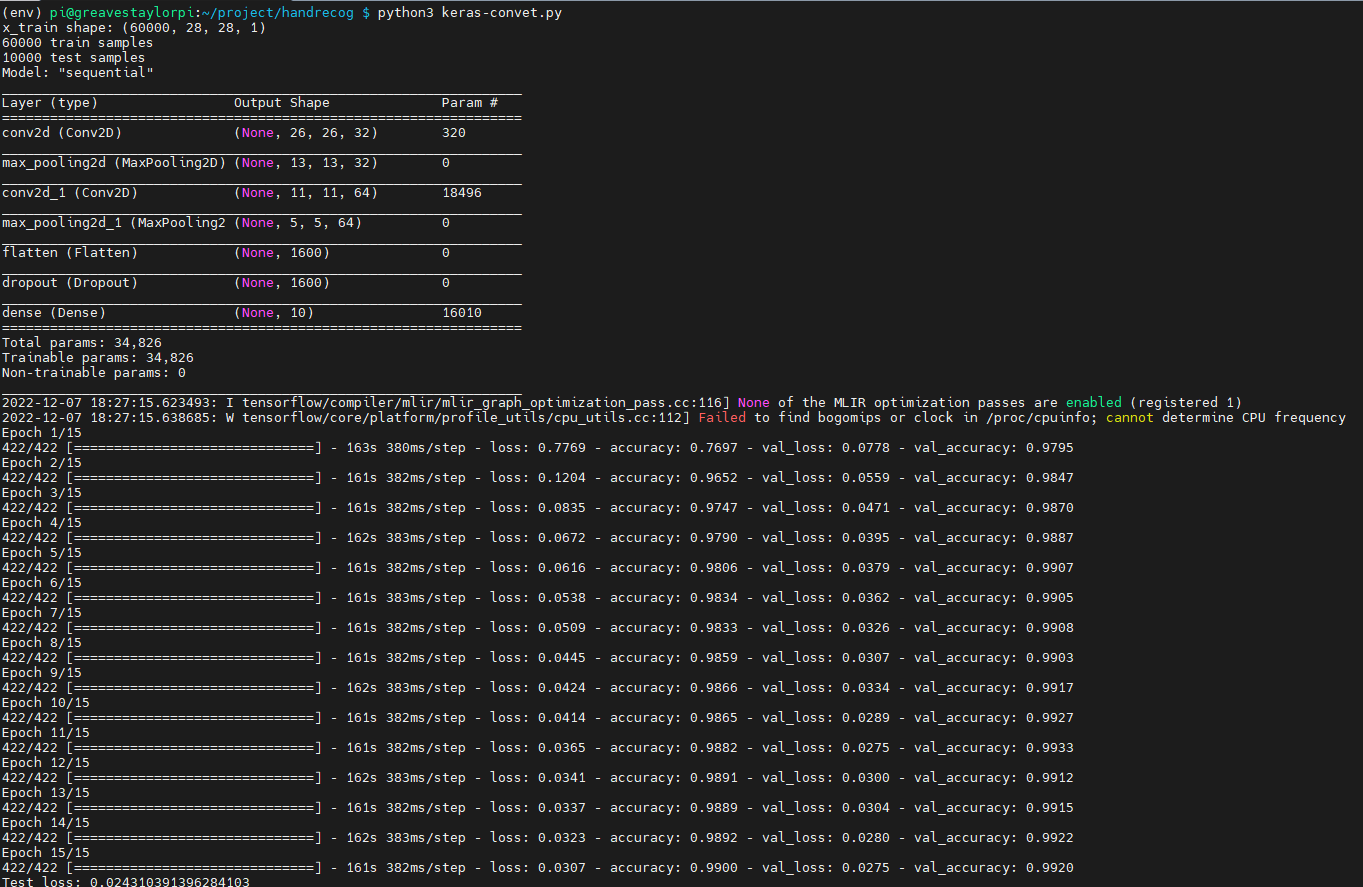

<div align="center"> <i>Figure 5: Image of the results of training my model on the pi</i>

# <div align="center"> <u>Conclusion</u>

In conclusion, The Real-Time Handwriting Recognition system worked pretty well and had a very high level of accuracy and was able to work in many locations. While there were limitations to consider, especially what type of lighting you have in the environment that you are trying to use the system in. However, once those limitations have been taken into consideration, being able to run this system on portable system with limited resources like a Raspberry Pi proves the potential for neural networks to used in everyday situations by the average user.

# <div align="center"> <u>References</u>

<ul>
<li><a 
href= "https://nimblebox.ai/blog/dalle-2-openai">DALL E 2: AI That Can Render Masterpieces from Text!</a></li>
<li><a
href= "https://www.upgrad.com/blog/neural-network-architecture-components-algorithms/">

  “Neural Network: Architecture, Components & Top Algorithms.” UpGrad Blog, 22 Sept. 2022, https://www.upgrad.com/blog/neural-network-architecture-components-algorithms/
            Used for figure 1</a></li>
    </ul>

